
### <center>**ЛАБОРАТОРНА РОБОТА №2 <br>Аналіз та візуалізація даних з використанням бібліотек Matplotlib і Cartoру**</center>

Імпортуємо необхідні бібліотеки

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from cartopy import crs as ccrs, feature as cfeature
import warnings
warnings.filterwarnings("ignore")

Завантажуємо необхідні csv файли

In [2]:
df_trip = pd.read_csv('2016_trip_data.csv')
df_weather = pd.read_csv('2016_weather_data.csv')

Змінюємо тип даних для стовпців

In [3]:
df_trip = df_trip.astype({'starttime':'datetime64[ns]','stoptime':'datetime64[ns]', 'usertype': 'category','gender':'category'})
df_weather = df_weather.astype({'Date':'datetime64[ns]', 'Events': 'category'})

Фільтруємо дані

In [4]:
new_df_trip = df_trip[df_trip['from_station_name']!=df_trip['to_station_name']]
df_weather.loc[df_weather['Events'] == 'Fog , Rain', 'Events'] = 'Fog-Rain'
df_weather.loc[df_weather['Events'] == 'Rain , Snow', 'Events'] = 'Rain-Snow'
df_weather.loc[df_weather['Events'] == 'Rain , Thunderstorm', 'Events'] = 'Rain-Thunderstorm'
df_weather['Events'] = pd.Categorical(df_weather['Events']).remove_unused_categories()
df_weather.dropna(subset='Events',inplace=True)

### Візуалізація таблиці кількості поїздок за днями тижня

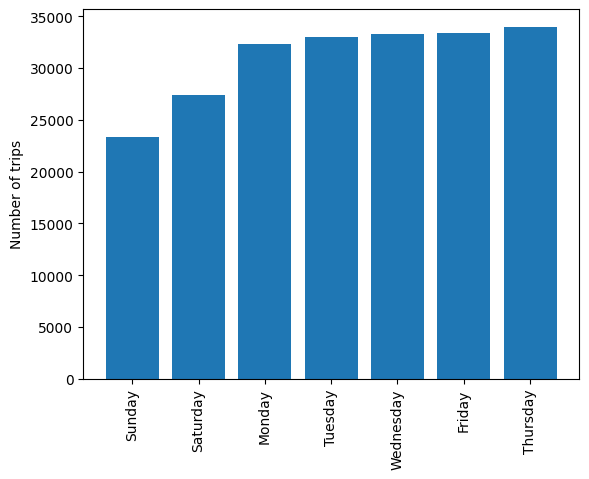

In [5]:
days = new_df_trip.groupby(new_df_trip['starttime'].dt.strftime('%A'))['starttime'].count().sort_values()

fig, ax = plt.subplots()

ax.bar(days.index,days.values)
ax.set_xticklabels(days.index, rotation = 90)
ax.set_ylabel('Number of trips')
plt.show()

### Візуалізація таблиці розподілу кількості поїздок за віком

In [6]:
def fun(x):
    if x < 1979:
        return 'Old'
    if x >= 1979 and x  < 1986:
        return 'Middle'
    if x >=1986:
        return 'Young'

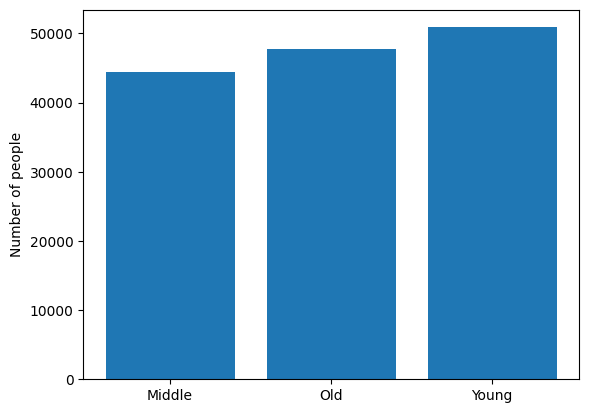

In [7]:
new_df_trip['age_group'] = new_df_trip['birthyear'].map(fun)
ages = new_df_trip.groupby('age_group')['age_group'].count().sort_values()

fig, ax = plt.subplots()

ax.bar(ages.index, ages.values)
ax.set_ylabel('Number of people')
plt.show()

Імпортуємо 2016_station_data.csv

In [8]:
df_station = pd.read_csv('2016_station_data.csv')
df_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station_id         58 non-null     object 
 1   name               58 non-null     object 
 2   lat                58 non-null     float64
 3   long               58 non-null     float64
 4   install_date       58 non-null     object 
 5   install_dockcount  58 non-null     int64  
 6   modification_date  17 non-null     object 
 7   current_dockcount  58 non-null     int64  
 8   decommission_date  4 non-null      object 
dtypes: float64(2), int64(2), object(5)
memory usage: 4.2+ KB


Виводимо перші 10 записів датафрейму

In [9]:
df_station[['station_id','name','lat','long']].head(10)

,station_id,name,lat,long
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208
4,CBD-03,7th Ave & Union St,47.610731,-122.332447
5,CBD-04,Union St & 4th Ave,47.609221,-122.335596
6,CBD-05,1st Ave & Marion St,47.604058,-122.335800
7,CBD-06,2nd Ave & Spring St,47.605950,-122.335768
8,CBD-07,City Hall / 4th Ave & James St,47.603509,-122.330409
9,CBD-13,2nd Ave & Pine St,47.610185,-122.339641


### Фрагмент карти берегової лінії з розташуванням станцій

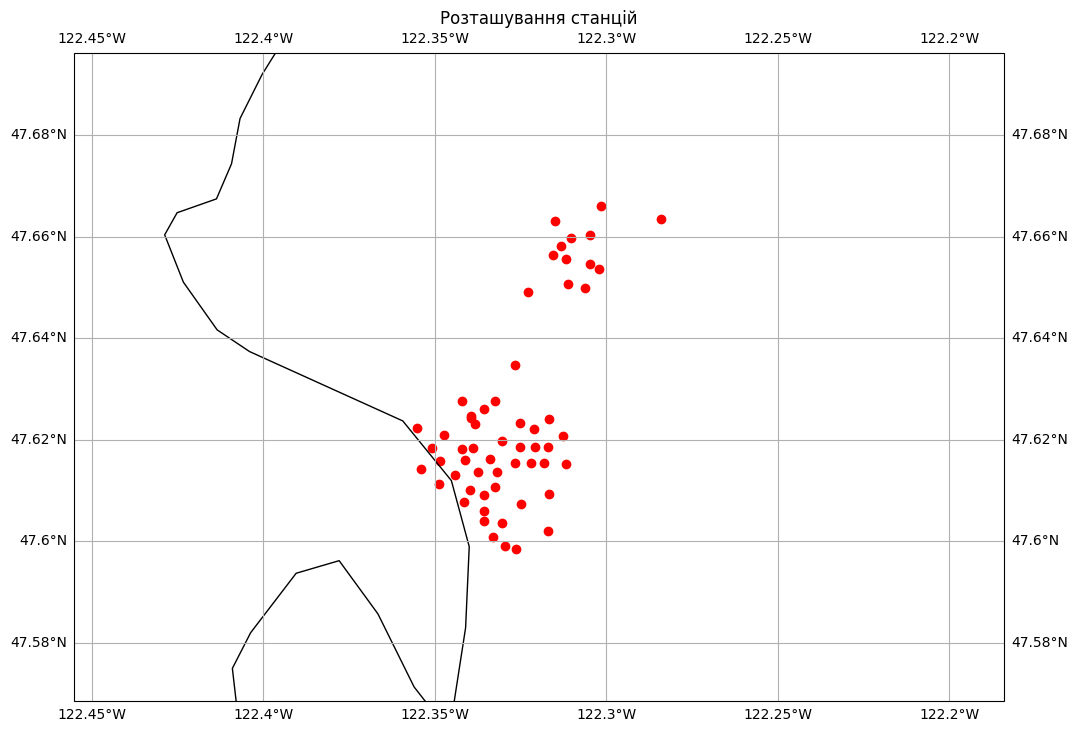

In [10]:
min_lat, max_lat = df_station['lat'].min()-0.03, df_station['lat'].max()+0.03
min_lon, max_lon = df_station['long'].min()-0.1, df_station['long'].max()+0.1

fig = plt.figure(figsize=(12, 10))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.add_feature(cfeature.COASTLINE)
ax.scatter(df_station['long'], df_station['lat'], color='red', marker='o', transform=ccrs.PlateCarree())
ax.set_extent([min_lon, max_lon, min_lat, max_lat],)
ax.gridlines(draw_labels=True)

plt.title('Розташування станцій')
plt.xlabel('Довгота')
plt.ylabel('Широта')
plt.show()

### Щільність розподілу логарифму тривалості подорожей

In [11]:
log_trip_duration = np.log(df_trip['tripduration'].div(60).astype(int))
log_trip_duration   

0         2.772589
1         2.708050
2         2.639057
3         2.639057
4         2.708050
            ...   
236060    2.397895
236061    3.465736
236062    3.465736
236063    3.433987
236064    3.433987
Name: tripduration, Length: 236065, dtype: float64

<Axes: ylabel='Density'>

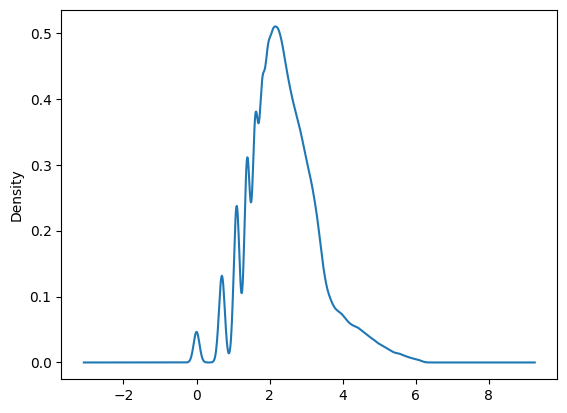

In [12]:
log_trip_duration.plot.kde()

### Середня тривалість подорожей для кожного типу опадів

In [13]:
df_merged = df_trip.merge(df_weather[['Date','Events']],how='inner' ,left_on=pd.to_datetime(df_trip['starttime'].dt.date),right_on='Date')
df_merged.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,Date,Events
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,2014-10-13,Rain
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,2014-10-13,Rain
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,2014-10-13,Rain
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0,2014-10-13,Rain
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0,2014-10-13,Rain


Примітка: оскільки на початку ми видалили спостреження у df_weather, де Events має пусте значення, то після об'єдання двох таблиць маємо набагато менше записів. Включати записи, де невідома погода не має сенсу.

In [14]:
res = df_merged.groupby('Events')['tripduration'].mean().div(60).sort_values()
res

Events
Rain-Snow            12.009937
Fog-Rain             12.127939
Fog                  15.561365
Rain                 16.997602
Rain-Thunderstorm    18.051965
Snow                 19.560447
Name: tripduration, dtype: float64

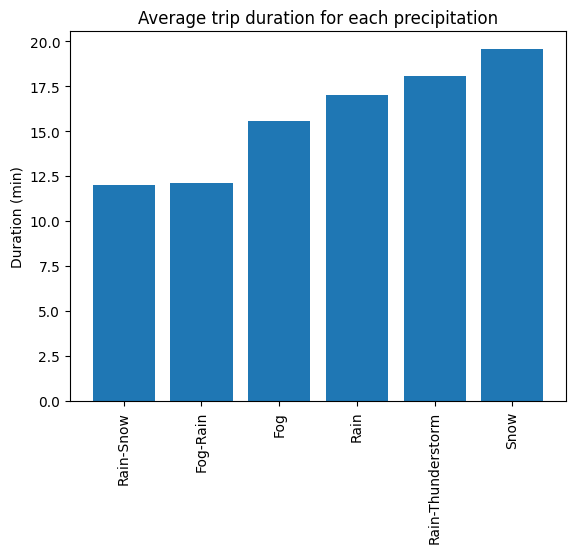

In [15]:
fig, ax = plt.subplots()

ax.bar(res.index,res.values)
ax.set_xticklabels(res.index, rotation = 90)
ax.set_ylabel('Duration (min)')
ax.set_title('Average trip duration for each precipitation') 
plt.show()